In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('./data/train.csv')
test_data = pd.read_csv('./data/test.csv')

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


In [4]:
train_data.head()

textID                                               text  \
0  cb774db0d1                I`d have responded, if I were going   
1  549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2  088c60f138                          my boss is bullying me...   
3  9642c003ef                     what interview! leave me alone   
4  358bd9e861   Sons of ****, why couldn`t they put them on t...   

                         selected_text sentiment  
0  I`d have responded, if I were going   neutral  
1                             Sooo SAD  negative  
2                          bullying me  negative  
3                       leave me alone  negative  
4                        Sons of ****,  negative

In [5]:
print(train_data.notnull().sum())
print('-'*30)
print(train_data.isnull().sum())

textID           27481
text             27480
selected_text    27480
sentiment        27481
dtype: int64
------------------------------
textID           0
text             1
selected_text    1
sentiment        0
dtype: int64


In [6]:
train_data.dropna(axis=0, inplace=True)

<AxesSubplot:title={'center':'Phân phối sentiment trong tập train'}>

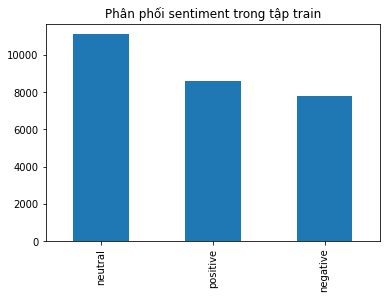

In [7]:
train_data['sentiment'].value_counts().plot(kind='bar', title='Phân phối sentiment trong tập train')

<AxesSubplot:title={'center':'Phân phối sentiment tập test'}>

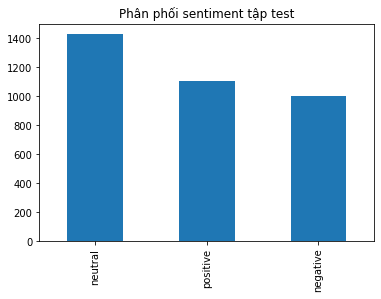

In [8]:
test_data['sentiment'].value_counts().plot(kind='bar', title='Phân phối sentiment tập test')

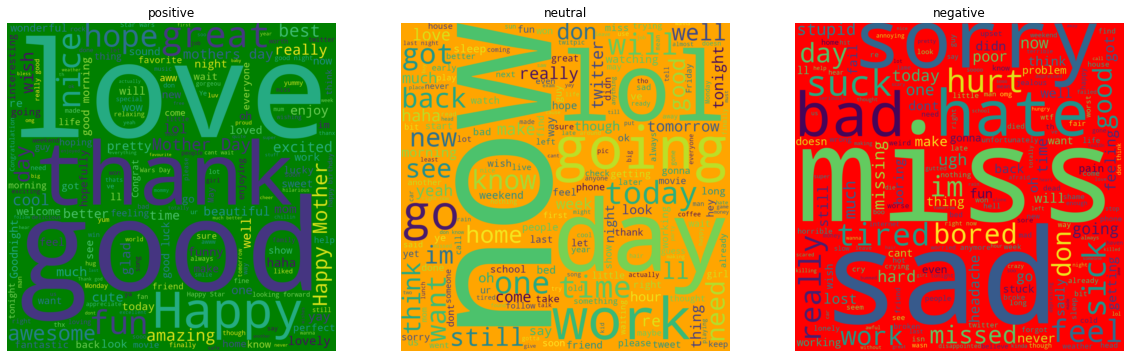

In [10]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
stop_w = set(STOPWORDS)

sentiment=['positive','neutral','negative']
fig, a = plt.subplots(1,3, figsize=(20,20))
for i,s in enumerate(sentiment):   
    total_token = ''
    total_token +=' '.join(train_data.loc[train_data['sentiment']==s,'selected_text'])
    if (s == 'positive'):
        w_cloud = WordCloud(width=1200, height=1200, background_color='green', stopwords = stop_w, min_font_size=12).generate(total_token)
    if (s == 'neutral'):
        w_cloud = WordCloud(width=1200, height=1200, background_color='orange', stopwords = stop_w, min_font_size=12).generate(total_token)
    if (s == 'negative'):
        w_cloud = WordCloud(width=1200, height=1200, background_color='red', stopwords = stop_w, min_font_size=12).generate(total_token)
    a[i].imshow(w_cloud, interpolation = 'bilinear')  
    a[i].set_title(s)
    a[i].axis('off')

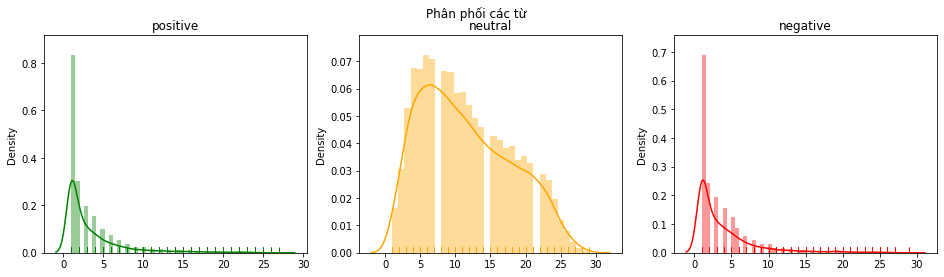

In [13]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
color = ['green', 'orange', 'red']
def unique_words_analysis(train_data):
  fig, ax = plt.subplots(1, 3, figsize=(16,4))
  for i, s in enumerate(sentiment):
    new = train_data[train_data['sentiment']==s]['selected_text'].map(lambda x: len(set(x.split())))
    sns.distplot(new.values, ax=ax[i], color=color[i], rug=True)
    ax[i].set_title(s)
  fig.suptitle("Phân phối các từ")
  fig.show()

unique_words_analysis(train_data)